In [1]:
!pip uninstall tensorflow -y

Uninstalling tensorflow-1.15.0:
  Successfully uninstalled tensorflow-1.15.0


In [2]:
!pip install tensorflow-gpu==2.0.0

     |████████████████████████████████| 380.8MB 48kB/s 
     |████████████████████████████████| 450kB 39.2MB/s 
     |████████████████████████████████| 3.8MB 47.7MB/s 
     |████████████████████████████████| 81kB 10.0MB/s 
ERROR: tensorboard 2.0.2 has requirement grpcio>=1.24.3, but you'll have grpcio 1.15.0 which is incompatible.
ERROR: google-colab 1.0.0 has requirement google-auth~=1.4.0, but you'll have google-auth 1.10.0 which is incompatible.
  Found existing installation: tensorflow-estimator 1.15.1
    Uninstalling tensorflow-estimator-1.15.1:
      Successfully uninstalled tensorflow-estimator-1.15.1
  Found existing installation: google-auth 1.4.2
    Uninstalling google-auth-1.4.2:
      Successfully uninstalled google-auth-1.4.2
  Found existing installation: tensorboard 1.15.0
    Uninstalling tensorboard-1.15.0:
      Successfully uninstalled tensorboard-1.15.0


In [1]:
try:
  import tensorflow.compat.v2 as tf
except Exception:
  pass

tf.enable_v2_behavior()

print(tf.__version__)

2.0.0


In [0]:
!kill -9 -1

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
#memory that we can use
!cat /proc/meminfo | grep 'MemAvailable'

MemAvailable:   12461648 kB


In [0]:
#hard disk that we can use
!df -h / | awk '{print $4}'

Avail
309G


### Import libraries

In [2]:
from scipy.io import wavfile
from scipy.fftpack import fft
from os import listdir
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import IPython.display as dis
import re
import gzip
import tarfile

In [0]:
'''tar = tarfile.open('drive/My Drive/data_speech_commands_v0.02.tar.gz', "r:gz")
tar.extractall(path='drive/My Drive/speech')
tar.close()'''

In [0]:
'''%time
for tarinfo in tar:
    print(tarinfo.name)'''

CPU times: user 2 µs, sys: 1e+03 ns, total: 3 µs
Wall time: 4.77 µs
.
./eight
./eight/1b88bf70_nohash_0.wav
./eight/798f702a_nohash_2.wav
./eight/b12bef84_nohash_1.wav
./eight/05b2db80_nohash_1.wav
./eight/b66f4f93_nohash_5.wav
./eight/750e3e75_nohash_0.wav
./eight/3852fca2_nohash_0.wav
./eight/5ac04a92_nohash_0.wav
./eight/778a4a01_nohash_0.wav
./eight/61e50f62_nohash_0.wav
./eight/0cb74144_nohash_2.wav
./eight/17c94b23_nohash_0.wav
./eight/037c445a_nohash_1.wav
./eight/3d794813_nohash_4.wav
./eight/11321027_nohash_0.wav
./eight/06f6c194_nohash_4.wav
./eight/b97c9f77_nohash_1.wav
./eight/10467b06_nohash_1.wav
./eight/321aba74_nohash_0.wav
./eight/d3831f6a_nohash_3.wav
./eight/d3831f6a_nohash_4.wav
./eight/baf01c1f_nohash_0.wav
./eight/472b8045_nohash_1.wav
./eight/64e48f55_nohash_1.wav
./eight/ab46af55_nohash_2.wav
./eight/6969e51a_nohash_0.wav
./eight/48bdc11c_nohash_0.wav
./eight/2e75d37a_nohash_1.wav
./eight/cb2929ce_nohash_4.wav
./eight/a6285644_nohash_2.wav
./eight/f30285c8_nohas

##### Creating Data Frame

In [8]:
a = os.listdir('drive/My Drive/speech')
print(', '.join(a))

four, forward, off, five, on, six, down, house, two, visual, up, zero, three, stop, follow, happy, backward, learn, cat, right, eight, sheila, nine, yes, one, no, left, tree, bed, bird, go, wow, seven, marvin, dog, background_noise


In [0]:
path = 'drive/My Drive/speech/'
yes = pd.DataFrame({'file':listdir(path +'yes'), 'target':['yes' for x in range(len(listdir(path +'yes')))]})
background_noise = pd.DataFrame({'file':listdir(path +'background_noise'), 'target':['background_noise' for x in range(len(listdir(path +'background_noise')))]})
no = pd.DataFrame({'file':listdir(path +'no'), 'target':['no' for x in range(len(listdir(path +'no')))]})
backward = pd.DataFrame({'file':listdir(path +'backward'), 'target':['backward' for x in range(len(listdir(path +'backward')))]})
bed = pd.DataFrame({'file':listdir(path +'bed'), 'target':['bed' for x in range(len(listdir(path +'bed')))]})
bird = pd.DataFrame({'file':listdir(path +'bird'), 'target':['bird' for x in range(len(listdir(path +'bird')))]})
cat = pd.DataFrame({'file':listdir(path +'cat'), 'target':['cat' for x in range(len(listdir(path +'cat')))]})
dog = pd.DataFrame({'file':listdir(path +'dog'), 'target':['dog' for x in range(len(listdir(path +'dog')))]})
down = pd.DataFrame({'file':listdir(path +'down'), 'target':['down' for x in range(len(listdir(path +'down')))]})
eight = pd.DataFrame({'file':listdir(path +'eight'), 'target':['eight' for x in range(len(listdir(path +'eight')))]})
five = pd.DataFrame({'file':listdir(path +'five'), 'target':['five' for x in range(len(listdir(path +'five')))]})
follow = pd.DataFrame({'file':listdir(path +'follow'), 'target':['follow' for x in range(len(listdir(path +'follow')))]})
forward = pd.DataFrame({'file':listdir(path +'forward'), 'target':['forward' for x in range(len(listdir(path +'forward')))]})
four = pd.DataFrame({'file':listdir(path +'four'), 'target':['four' for x in range(len(listdir(path +'four')))]})
go = pd.DataFrame({'file':listdir(path +'go'), 'target':['go' for x in range(len(listdir(path +'go')))]})
happy = pd.DataFrame({'file':listdir(path +'happy'), 'target':['happy' for x in range(len(listdir(path +'happy')))]})
house = pd.DataFrame({'file':listdir(path +'house'), 'target':['house' for x in range(len(listdir(path +'house')))]})
learn = pd.DataFrame({'file':listdir(path +'learn'), 'target':['learn' for x in range(len(listdir(path +'learn')))]})
left = pd.DataFrame({'file':listdir(path +'left'), 'target':['left' for x in range(len(listdir(path +'left')))]})
marvin = pd.DataFrame({'file':listdir(path +'marvin'), 'target':['marvin' for x in range(len(listdir(path +'marvin')))]})
nine = pd.DataFrame({'file':listdir(path +'nine'), 'target':['nine' for x in range(len(listdir(path +'nine')))]})
off = pd.DataFrame({'file':listdir(path +'off'), 'target':['off' for x in range(len(listdir(path +'off')))]})
on = pd.DataFrame({'file':listdir(path +'on'), 'target':['on' for x in range(len(listdir(path +'on')))]})
one = pd.DataFrame({'file':listdir(path +'one'), 'target':['one' for x in range(len(listdir(path +'one')))]})
right = pd.DataFrame({'file':listdir(path +'right'), 'target':['right' for x in range(len(listdir(path +'right')))]})
seven = pd.DataFrame({'file':listdir(path +'seven'), 'target':['seven' for x in range(len(listdir(path +'seven')))]})
sheila = pd.DataFrame({'file':listdir(path +'sheila'), 'target':['sheila' for x in range(len(listdir(path +'sheila')))]})
six = pd.DataFrame({'file':listdir(path +'six'), 'target':['six' for x in range(len(listdir(path +'six')))]})
stop = pd.DataFrame({'file':listdir(path +'stop'), 'target':['stop' for x in range(len(listdir(path +'stop')))]})
three = pd.DataFrame({'file':listdir(path +'three'), 'target':['three' for x in range(len(listdir(path +'three')))]})
tree = pd.DataFrame({'file':listdir(path +'tree'), 'target':['tree' for x in range(len(listdir(path +'tree')))]})
two = pd.DataFrame({'file':listdir(path +'two'), 'target':['two' for x in range(len(listdir(path +'two')))]})
up = pd.DataFrame({'file':listdir(path +'up'), 'target':['up' for x in range(len(listdir(path +'up')))]})
visual = pd.DataFrame({'file':listdir(path +'visual'), 'target':['visual' for x in range(len(listdir(path +'visual')))]})
wow = pd.DataFrame({'file':listdir(path +'wow'), 'target':['wow' for x in range(len(listdir(path +'wow')))]})
zero = pd.DataFrame({'file':listdir(path +'zero'), 'target':['zero' for x in range(len(listdir(path +'zero')))]})

In [0]:
label = pd.concat([background_noise, backward, bed, bird, cat, dog, down, eight, five, follow, forward, four, go, happy, 
                   house, learn, left, marvin, nine, no, off, on, one, right, seven, sheila, six, stop, three, tree, 
                   two, up, visual, wow, yes, zero],ignore_index=True)

In [0]:
#label.to_csv('drive/My Drive/speech notebook/speech_raw.csv')

### An overview of Data Distribution

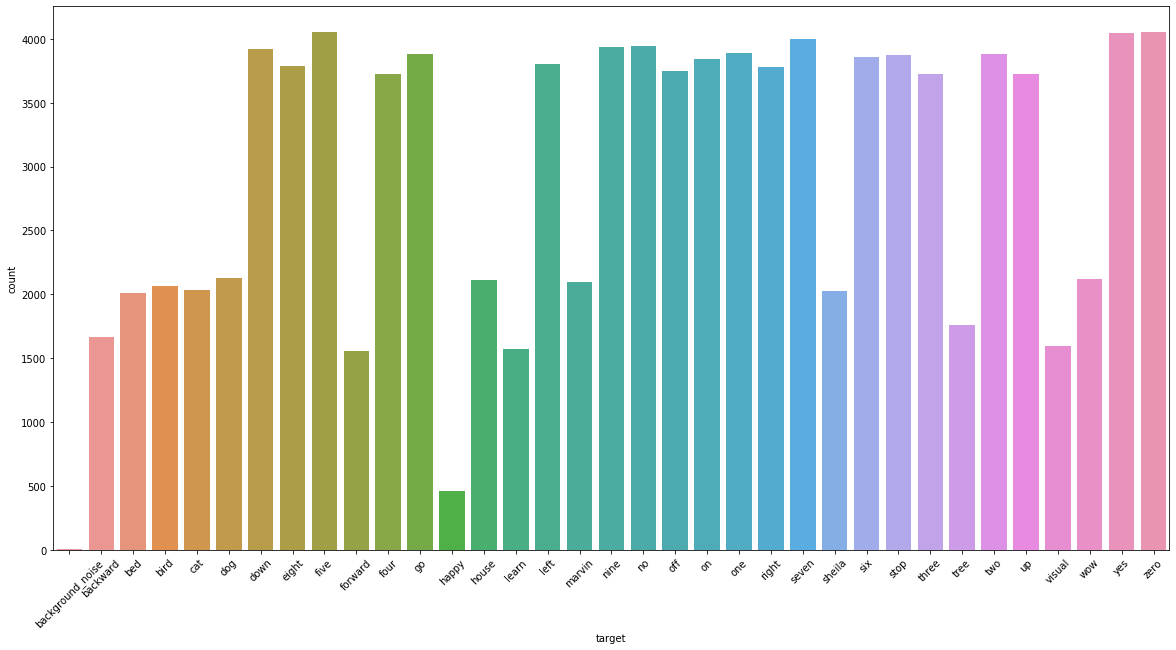

In [12]:
plt.figure(figsize=(20,10))
chart = sns.countplot(
    data=label,
    x='target')
chart.set_xticklabels(chart.get_xticklabels(), rotation=45)# horizontalalignment='right')
plt.show()

# Data science process

### Data Analysis

Setting data pipeline path

In [4]:
a = os.listdir('C:/Users/My Computer/Desktop/DS projects/DSIA/Capstone project/speech recognition/data')
print(', '.join(a))

background_noise, backward, bed, bird, cat, dog, down, eight, five, follow, forward, four, go, happy, house, learn, left, marvin, nine, no, off, on, one, right, seven, sheila, six, stop, three, tree, two, up, visual, wow, yes, zero


Randomly pick a wav file from the path

In [8]:
import random
b = random.choice(a)

In [14]:
b

'two'

In [15]:
d = one['file'].sample(n=1).to_string()
e = re.findall(r'\w+.wav',d)[0]
path = path +b + '/'+e
path

'drive/My Drive/speech/two/617aeb6c_nohash_3.wav'

Lets listen to the audio file!

In [16]:
print('Audio name:',e)
dis.Audio(path)

Audio name: 617aeb6c_nohash_3.wav


1.Sound Wave Form

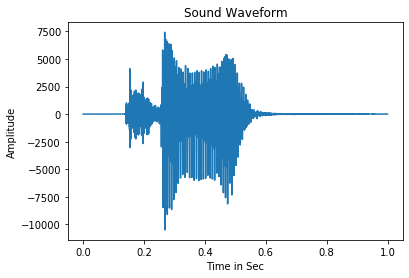

In [17]:
fs, signals = wavfile.read(path)
def plot_sine_wav(file_path):
    time = np.linspace(0, len(signals)/fs, num=len(signals))
    plt.plot(time,signals)
    plt.xlabel('Time in Sec')
    plt.ylabel('Amplitude')
    plt.title('Sound Waveform')
    plt.show()

plot_sine_wav(path)

2.Fast Fourier Transform (FFT)

In [0]:
from scipy import signal

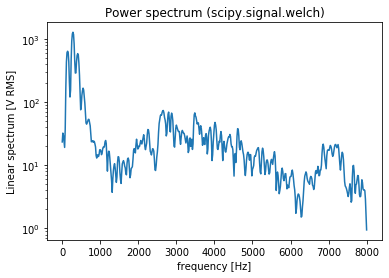

In [19]:
# signal.welch
f, Pxx_spec = signal.welch(signals, fs, 'flattop', 1024, scaling='spectrum')
plt.figure()
plt.semilogy(f, np.sqrt(Pxx_spec))
plt.xlabel('frequency [Hz]')
plt.ylabel('Linear spectrum [V RMS]')
plt.title('Power spectrum (scipy.signal.welch)')
plt.show()

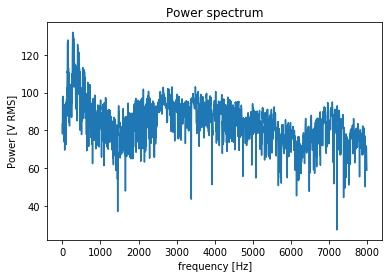

In [20]:
p = 20*np.log10(np.abs(np.fft.rfft(signals)))
f = np.linspace(0, fs/2, len(p))
plt.plot(f, p)
plt.xlabel('frequency [Hz]')
plt.ylabel('Power [V RMS]')
plt.title('Power spectrum')
plt.show()

In [0]:
def custom_fft(y, fs):
    T = 1.0 / fs
    N = y.shape[0]
    yf = fft(y)
    xf = np.linspace(0.0, 1.0/(2.0*T), N//2)
    vals = 2.0/N * np.abs(yf[0:N//2])  # FFT is simmetrical, so we take just the first half
    # FFT is also complex, to we take just the real part (abs)
    return xf, vals

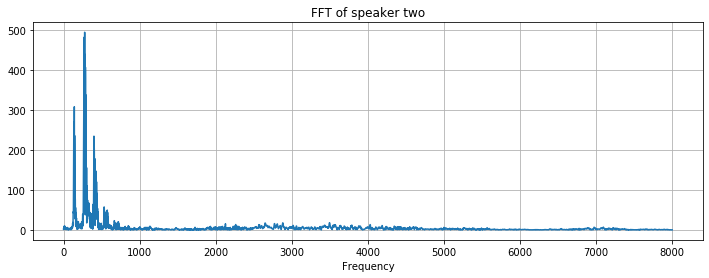

In [22]:
xf, vals = custom_fft(signals, fs)
plt.figure(figsize=(12, 4))
plt.title('FFT of speaker ' +b)
plt.plot(xf, vals)
plt.xlabel('Frequency')
plt.grid()
plt.show()

3. Spectrogram

In [0]:
def log_specgram(audio, sample_rate, window_size=20,
                 step_size=10, eps=1e-10):
    nperseg = int(round(window_size * fs / 1e3))
    noverlap = int(round(step_size * fs / 1e3))
    freqs, times, spec = signal.spectrogram(audio,
                                    fs=fs,
                                    window='hann',
                                    nperseg=nperseg,
                                    noverlap=noverlap,
                                    detrend=False)
    return freqs, times, np.log(spec.T.astype(np.float32) + eps)

Text(0.5, 0, 'Seconds')

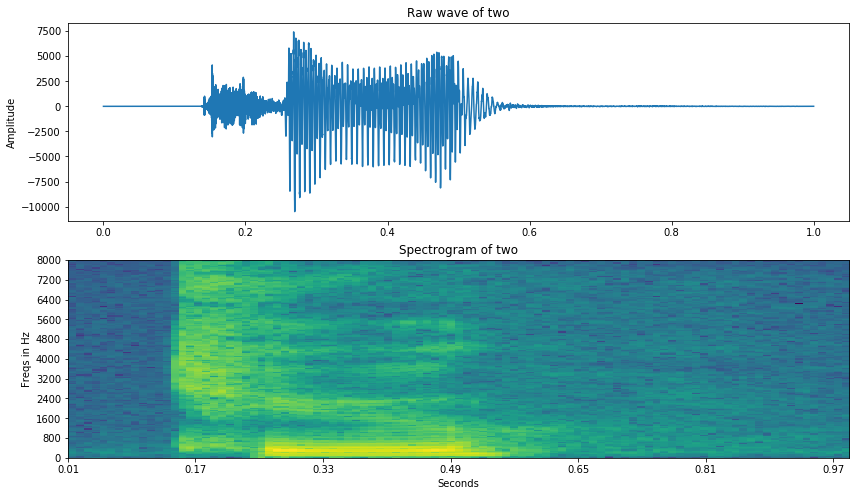

In [24]:
freqs, times, spectrogram = log_specgram(signals, fs)

fig = plt.figure(figsize=(14, 8))
ax1 = fig.add_subplot(211)
ax1.set_title('Raw wave of '+b)
ax1.set_ylabel('Amplitude')
ax1.plot(np.linspace(0, fs/len(signals), fs), signals)

ax2 = fig.add_subplot(212)
ax2.imshow(spectrogram.T, aspect='auto', origin='lower', 
           extent=[times.min(), times.max(), freqs.min(), freqs.max()])
ax2.set_yticks(freqs[::16])
ax2.set_xticks(times[::16])
ax2.set_title('Spectrogram of '+b)
ax2.set_ylabel('Freqs in Hz')
ax2.set_xlabel('Seconds')

In [0]:
import librosa
import librosa.display

In [0]:
y, sr = librosa.load(path)

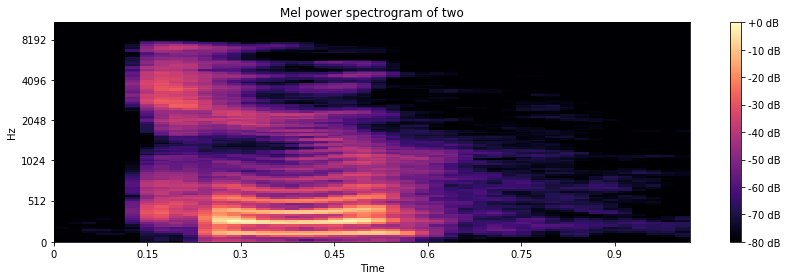

In [28]:
S = librosa.feature.melspectrogram(y, sr=sr, n_mels=128)

# Convert to log scale (dB). We'll use the peak power (max) as reference.
log_S = librosa.power_to_db(S, ref=np.max)

plt.figure(figsize=(12, 4))
librosa.display.specshow(log_S, sr=sr, x_axis='time', y_axis='mel')
plt.title('Mel power spectrogram of '+b)
plt.colorbar(format='%+02.0f dB')
plt.tight_layout()